# Introduction

The dataset originally has **330 features (columns)** but based on diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions the publisher of that dataset clean **BRFSS** data into a **useable format for machine learning alogrithms**. 
__________________________________________________________________________________________________________________________

**Important risk factors for diabetes :**

( blood pressure (high) , cholesterol (high) , smoking , diabetes , obesity , age , sex , race , diet , exercise , alcohol consumption , BMI , Household Income , Marital Status , Sleep , Time since last checkup , Education , Health care coverage , Mental Health )
___________________________________________________________________________________________________________________________

### About Columns :

**Diabetes_binary** : you have diabetes (0,1)

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI) 

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Import Libraries

_________________________________________________________________________________________________________________________

In [1]:
#conda install -c conda-forge mlxtend

In [2]:
#%pip install mlxtend

In [3]:
#conda install -q -c conda-forge ydata-profiling

In [4]:
#%pip install ydata-profiling

In [5]:
#%pip install --upgrade imbalanced-learn

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\ahmed\AppData\Local\Temp\ipykernel_17700\1308864780.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


________________________________________________________________________________________________________________

# Data Exploring 

______________________________________________________________________________________________________________________

In [191]:
Orginal_data = pd.read_csv(r"diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

In [192]:
data = pd.read_csv(r"diabetes_binary_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

__________________________________________________________________________________________________________________

## Dataset Report

In [193]:
profile = ProfileReport(data)

In [194]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [195]:
data.shape 

(253680, 22)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [197]:
data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [198]:
data.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

_____________________________________________________________________________________________________________________________

# Preprocessing

___________________________________________________________________________________________________________________

In [199]:
#check duplicated 
data.duplicated().sum()

24206

In [200]:
data.drop_duplicates(inplace=True)

In [201]:
data.duplicated().sum()

0

In [202]:
#Transform the data to integer

data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int32
 1   HighBP                229474 non-null  int32
 2   HighChol              229474 non-null  int32
 3   CholCheck             229474 non-null  int32
 4   BMI                   229474 non-null  int32
 5   Smoker                229474 non-null  int32
 6   Stroke                229474 non-null  int32
 7   HeartDiseaseorAttack  229474 non-null  int32
 8   PhysActivity          229474 non-null  int32
 9   Fruits                229474 non-null  int32
 10  Veggies               229474 non-null  int32
 11  HvyAlcoholConsump     229474 non-null  int32
 12  AnyHealthcare         229474 non-null  int32
 13  NoDocbcCost           229474 non-null  int32
 14  GenHlth               229474 non-null  int32
 15  MentHlth              229474 non-null  

**Check null values**

In [204]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**checking unique values in different variables**

In [205]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

In [206]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [207]:
v_counts(data)

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64
_____________________________________________________________________________
HighBP
0    125214
1    104260
Name: count, dtype: int64
_____________________________________________________________________________
HighChol
0    128129
1    101345
Name: count, dtype: int64
_____________________________________________________________________________
CholCheck
1    220176
0      9298
Name: count, dtype: int64
_____________________________________________________________________________
BMI
27    21514
26    17775
24    16497
28    14914
25    14793
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64
_____________________________________________________________________________
Smoker
0    122585
1    106889
Name: count, dtype: int64
_____________________________________________________________________________
Stroke
0    219190
1     10284
Name: count, dtype: int64
__

_______________________________________________________________________________________________________

**Check The Outliers**

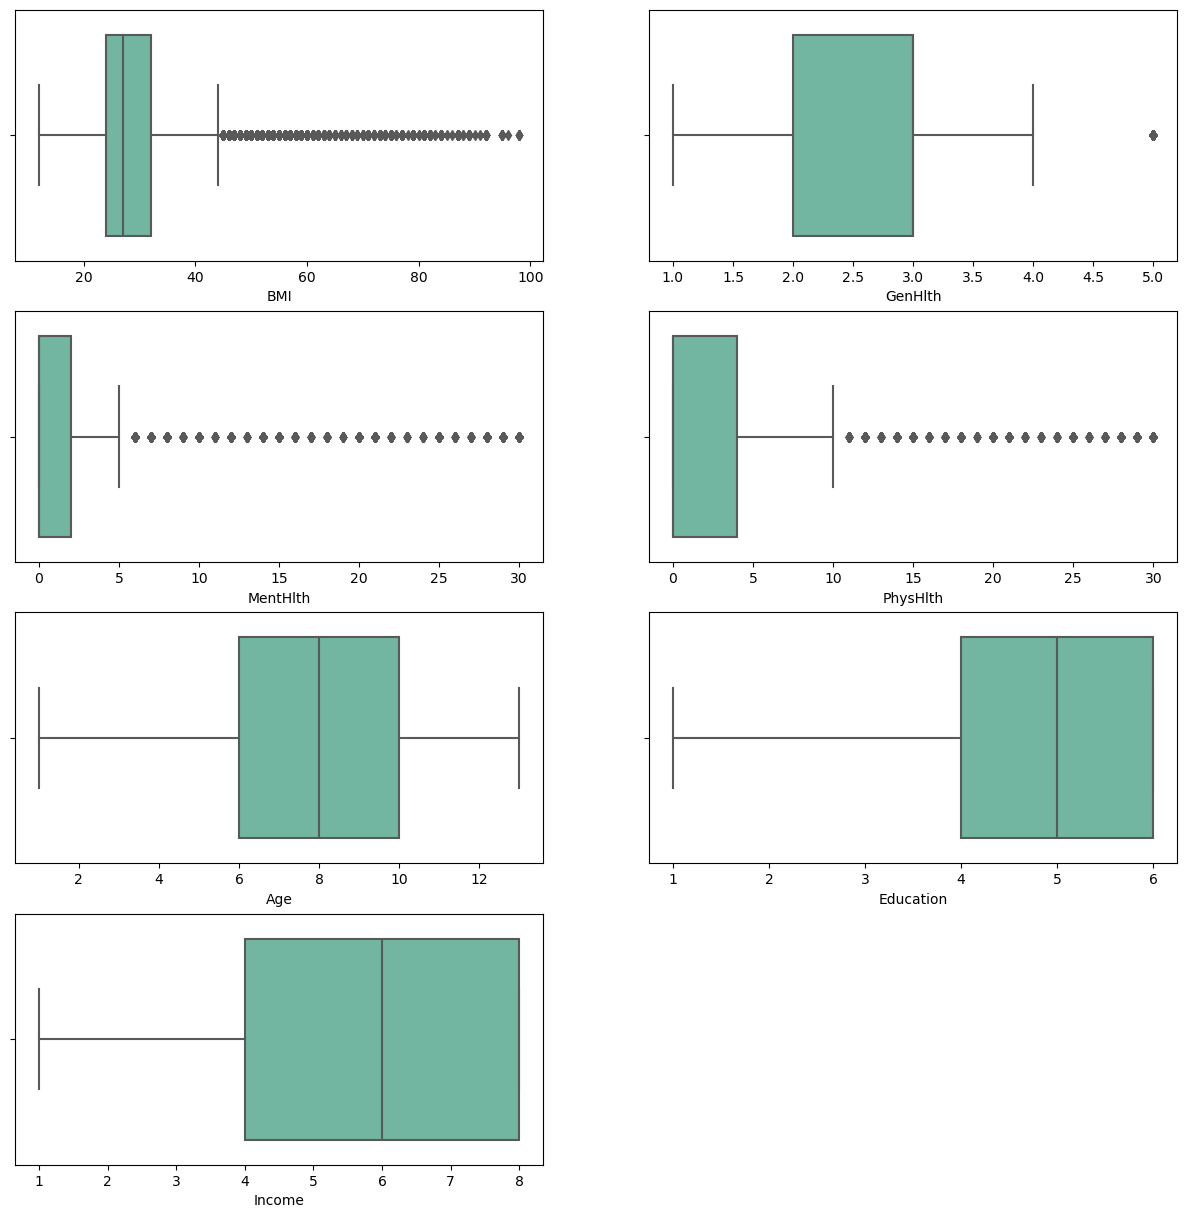

In [208]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

those aren't really outliers

_____________________________________________________________________________________________________________________

**Some codes that help us in our EDA**

In [209]:
#help us to show the categorical variable 
data2 = data.copy() 

In [210]:
# That help us to show the relation between features clearly

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

#Replacing 0 into Non-Diabetic and 1 into Diabetic 
#adding new column Diabetes_binary_str  

data2["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

___________________________________________________________________________________________________________________________

# EDA

_____________________________________________________________________________________________________________________

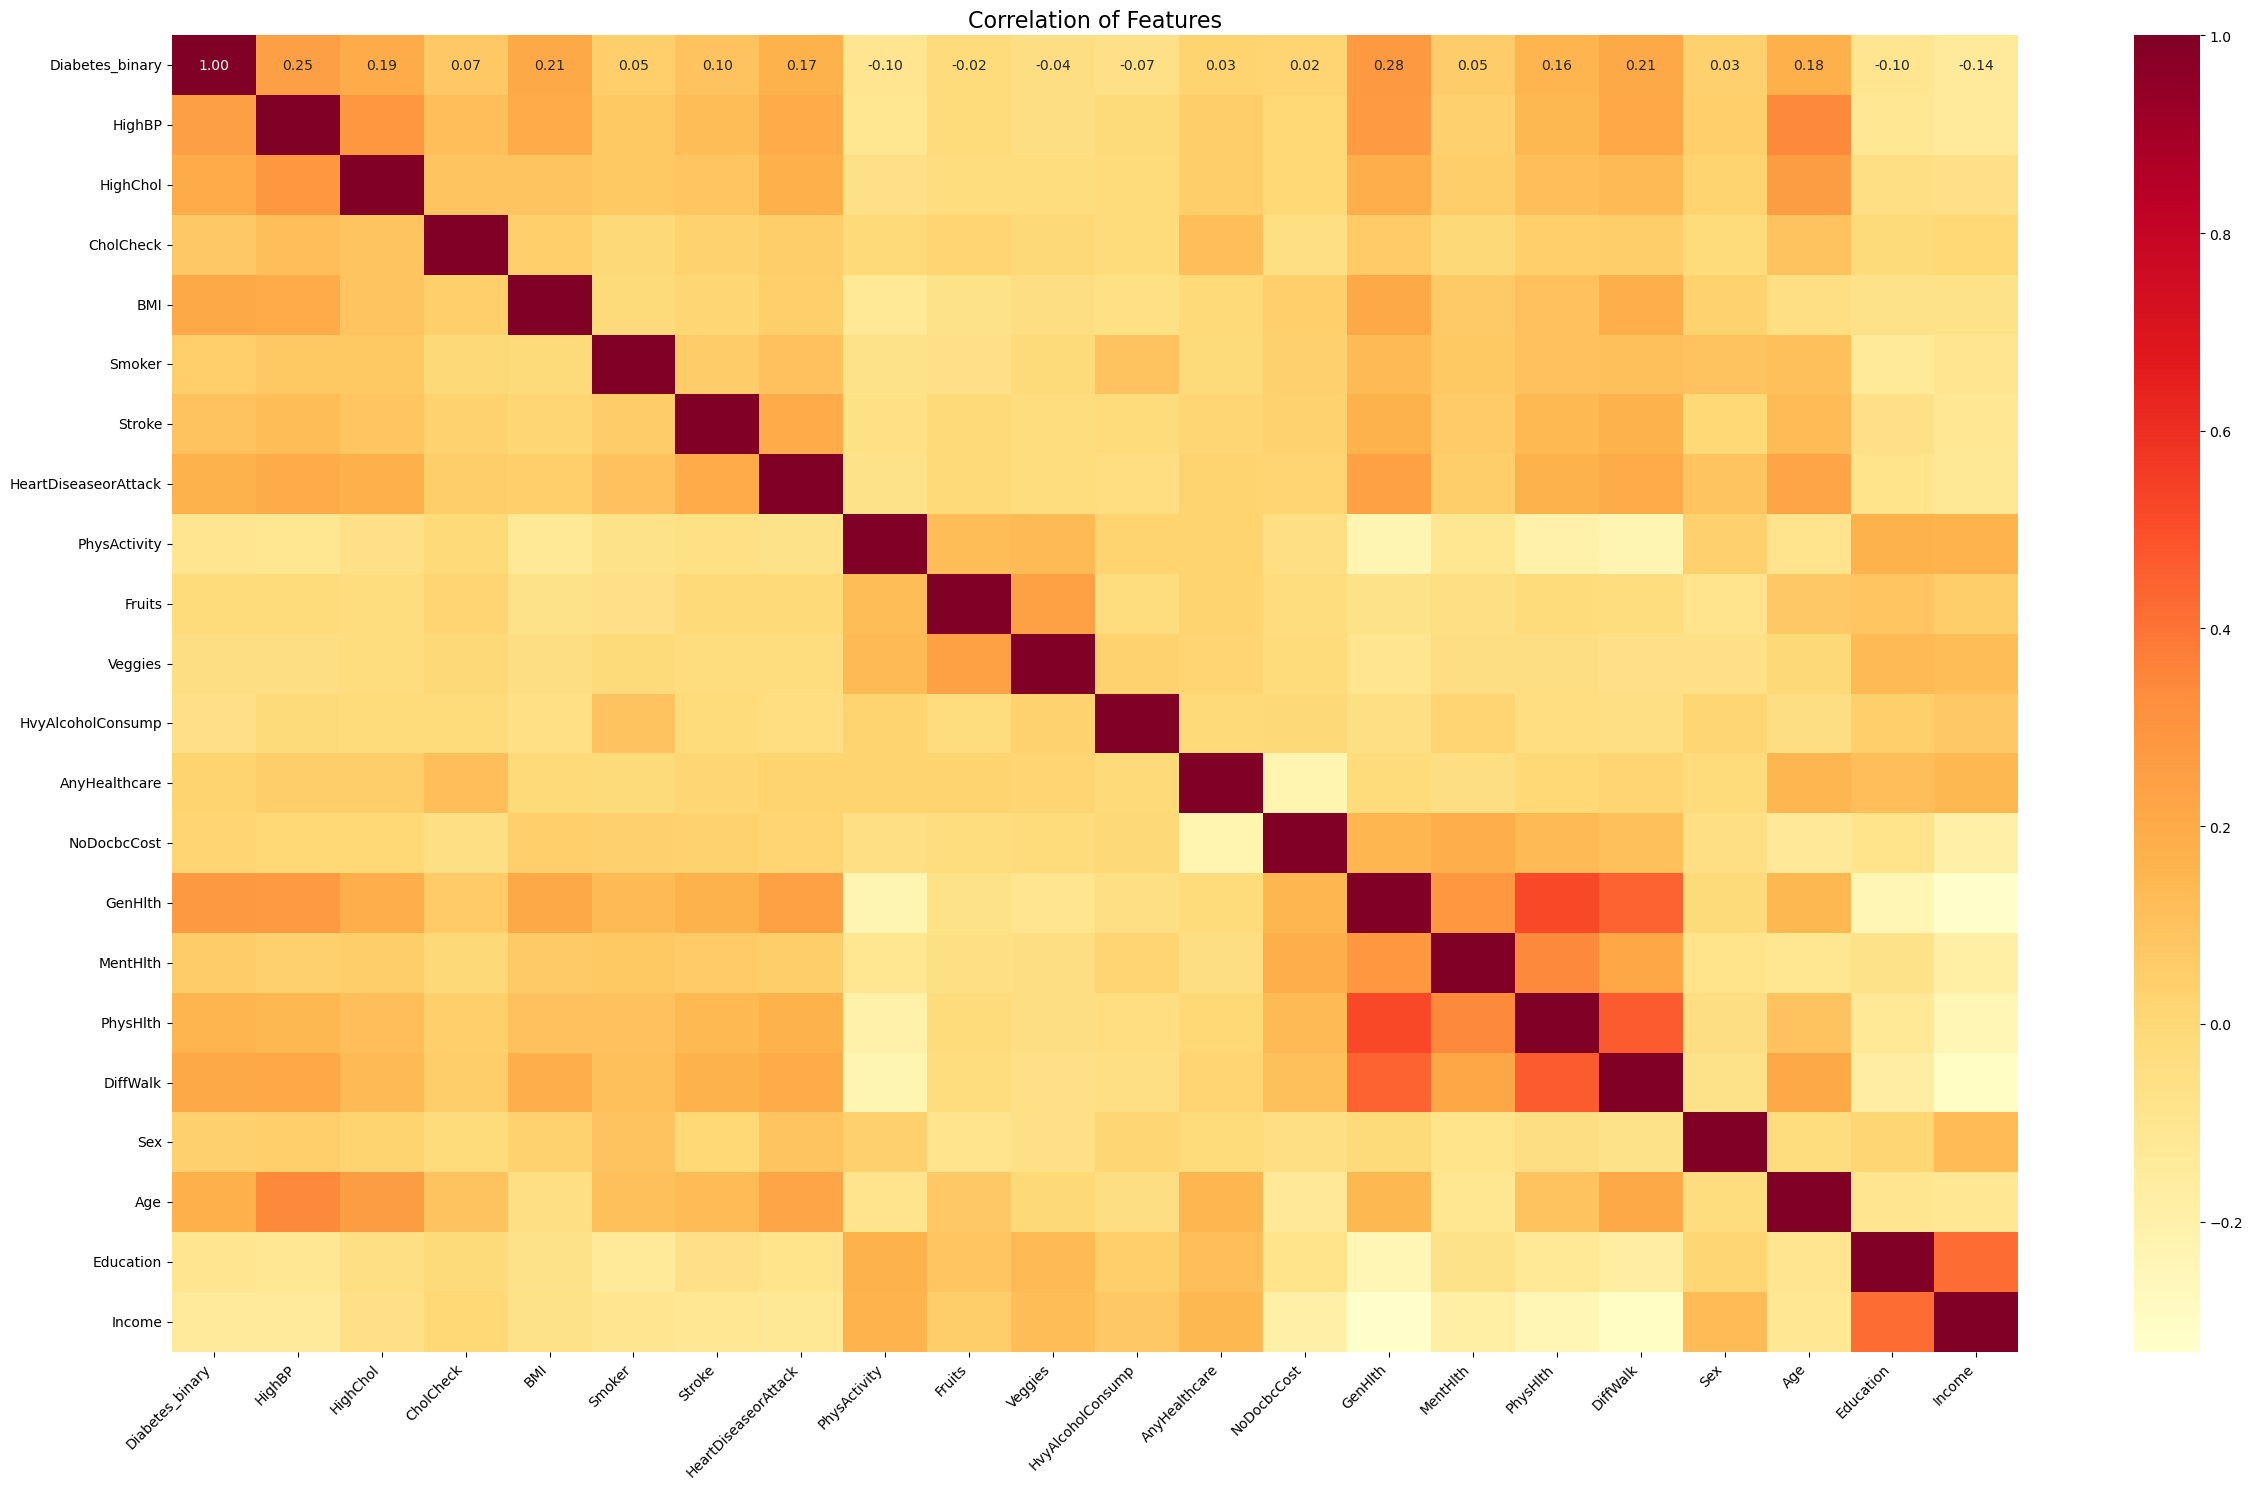

In [211]:
#using heatmap to understand correlation better in dataset data 
#Heatmap of correlation


plt.figure(figsize=(25, 15))  # Increase figure size
sns.heatmap(
    data.corr(), 
    annot=True, 
    cmap='YlOrRd', 
    annot_kws={"size": 10},  # Adjust annotation size
    fmt=".2f"  # Format the numbers to 2 decimal places
)
plt.title("Correlation of Features", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [212]:
import plotly.figure_factory as ff

corr_matrix = data.corr().round(2)
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    colorscale='YlOrRd',
    showscale=True
)
fig.update_layout(title="Correlation of Features", xaxis=dict(tickangle=45))
fig.show()


In [213]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic 
#adding new column Diabetes_binary_str  

data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

Correlation heatmap show relation between columns:

(GenHlth ,PhysHlth ),(PhysHlth , DiffWalk),(GenHlth ,DiffWalk )are highly correleted with each other => **positive relation**


(GenHlth ,Income ) , (DiffWalk , Income) are highly correleted with each other => **Nagative relation**

__________________________________________________________________________________________________________________

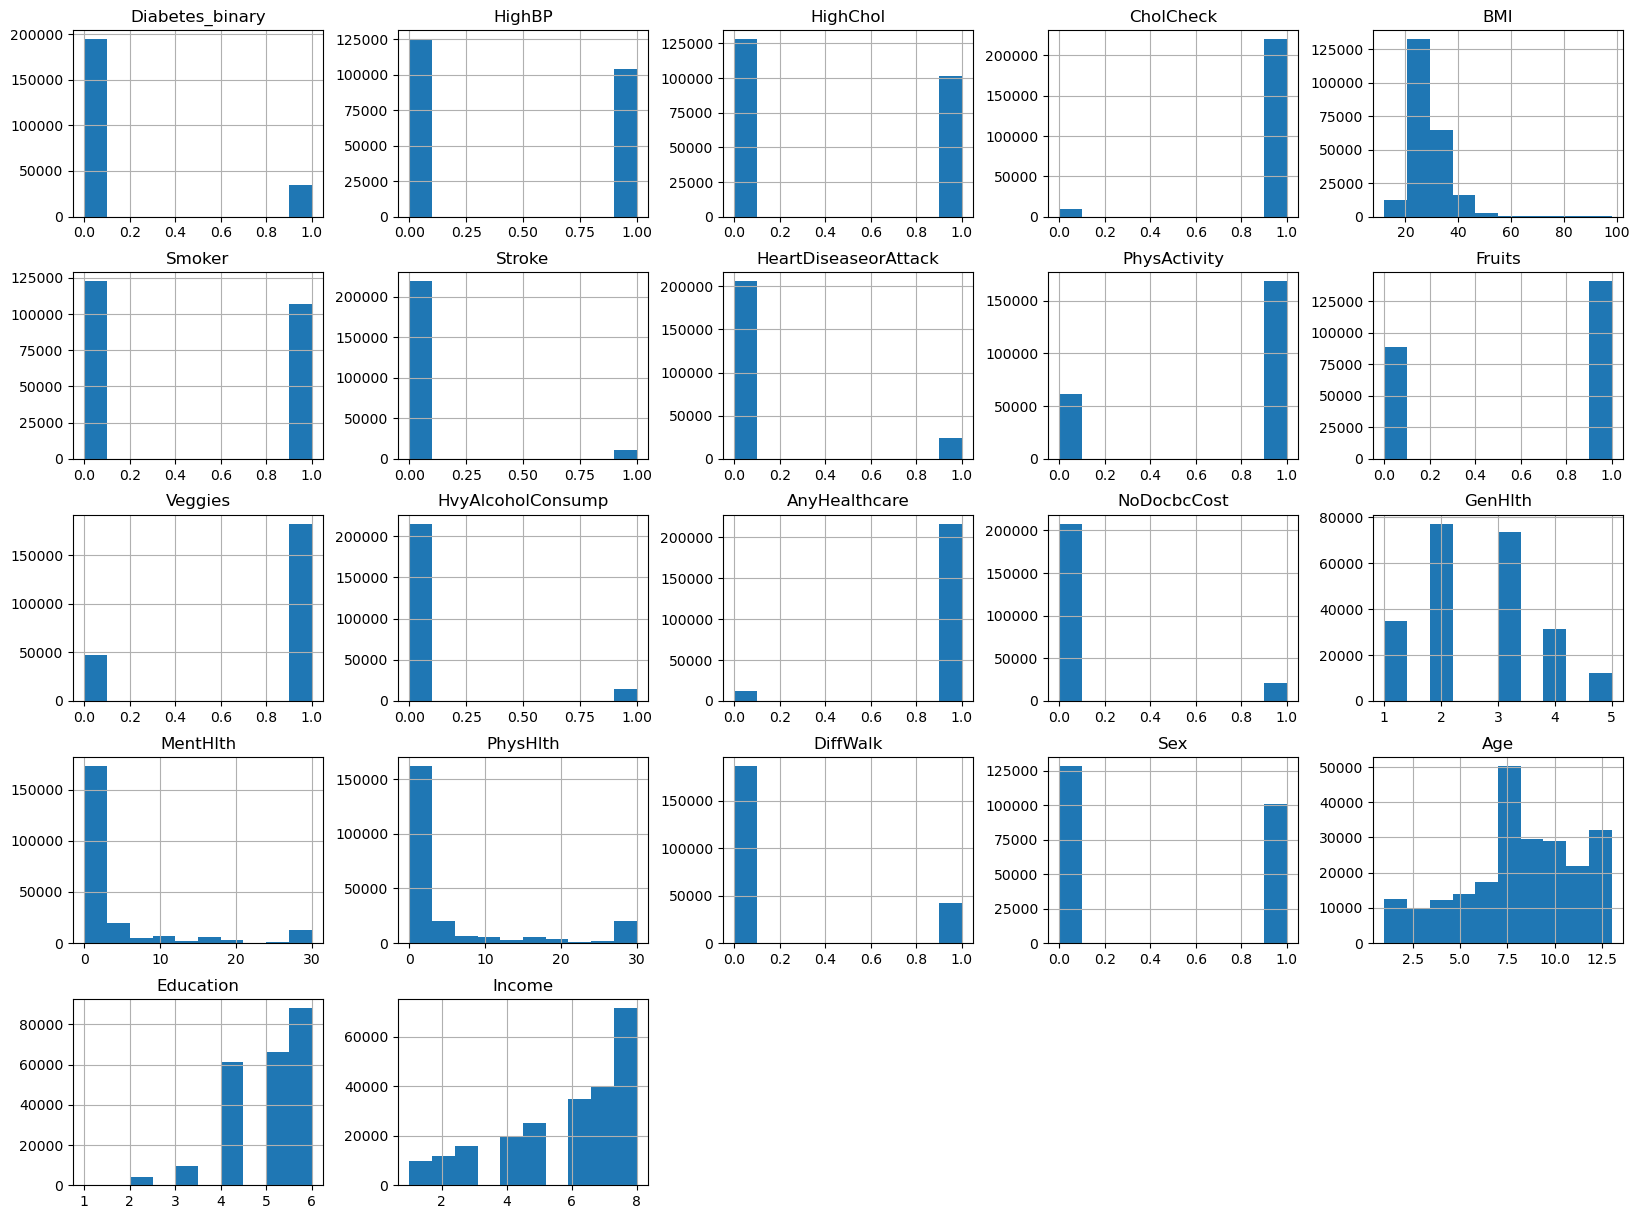

In [214]:
#using histogram to understand dataset data better

data.hist(figsize=(20,15));

____________________________________________________________________________________________________________________

**Visualization Of [Yes - NO] Columns and their relation with the target**

In [215]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [216]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

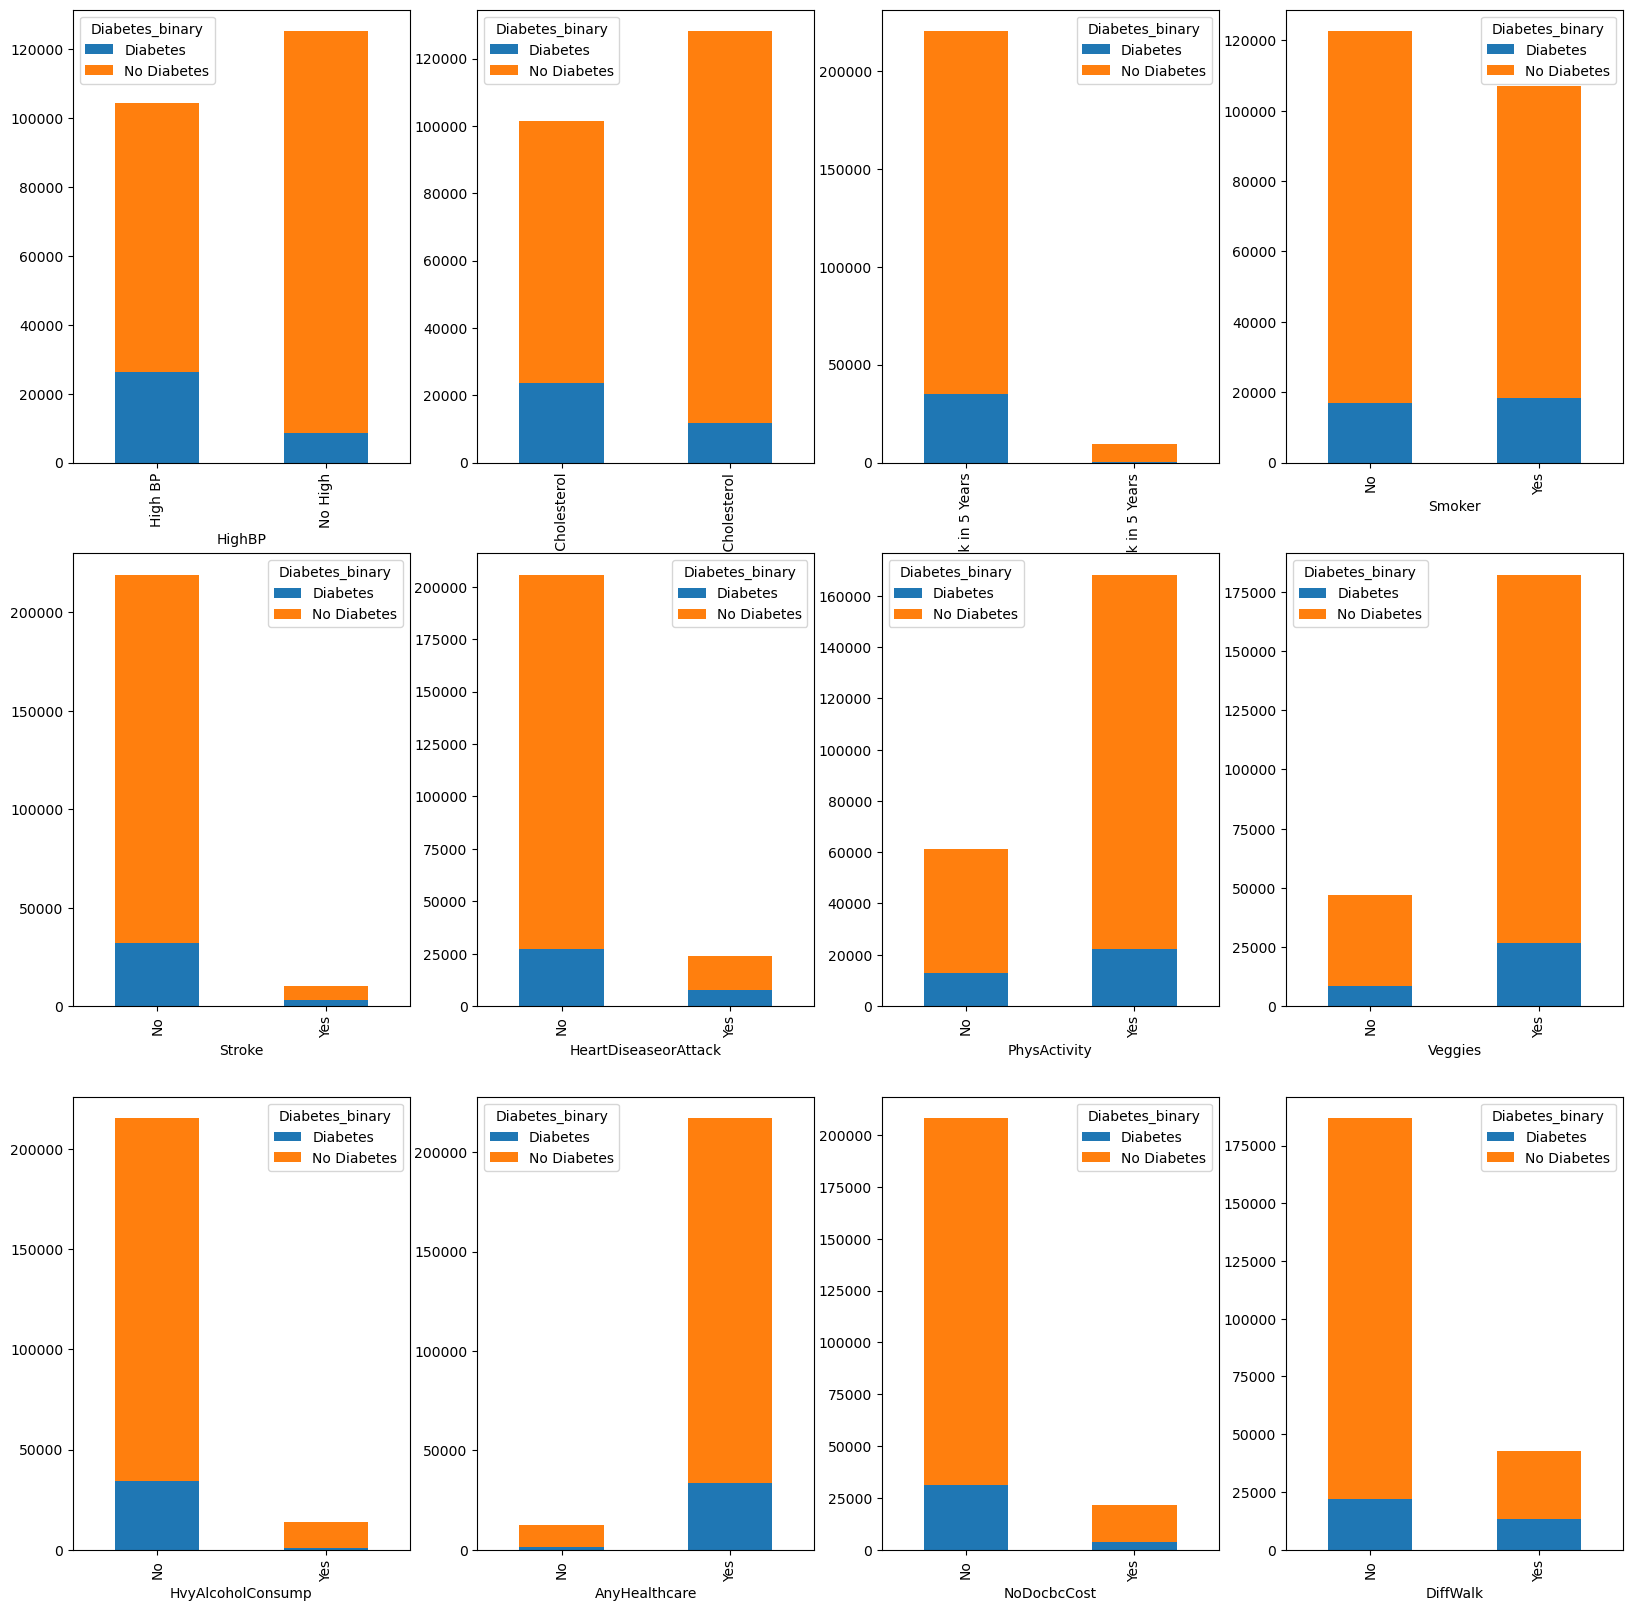

In [217]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

______________________________________________________________________________________________________________

**Let's view our target values "Daibetes_binary"**

In [218]:
#average of column Daibetes_binary 
# 0 for non-Diabetic person and 1 for Diabetic person

data2["Diabetes_binary"].value_counts()

Diabetes_binary
No Diabetes    194377
Diabetes        35097
Name: count, dtype: int64

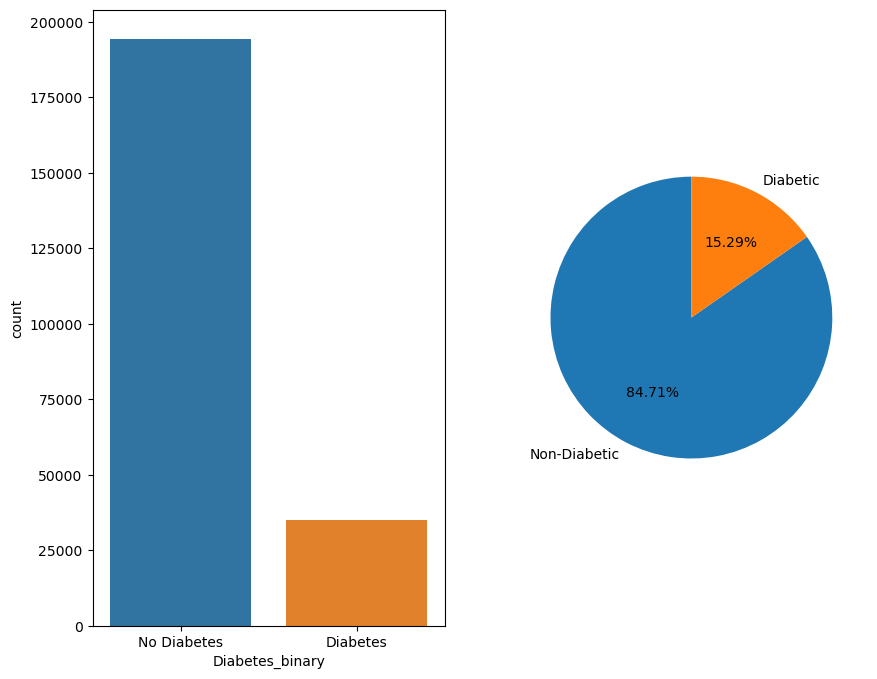

In [219]:
# Checking the value count of Diabetes_binary using countplot
figure1, plot1 = plt.subplots(1, 2, figsize=(10, 8))


sns.countplot(x='Diabetes_binary', data=data2, ax=plot1[0])

# Checking diabetic and non-diabetic people's average by pie
labels = ["Non-Diabetic", "Diabetic"]
sizes = data2["Diabetes_binary"].value_counts()  # Count the occurrences of each category

# Plotting the pie chart
plot1[1].pie(sizes, labels=labels, autopct='%.2f%%', startangle=90)

# Display the plots
plt.show()


We can see that healthy people is more than people with diabetes 

_____________________________________________________________________________________________________________________

**The feature "Age" and it's relation with the target**

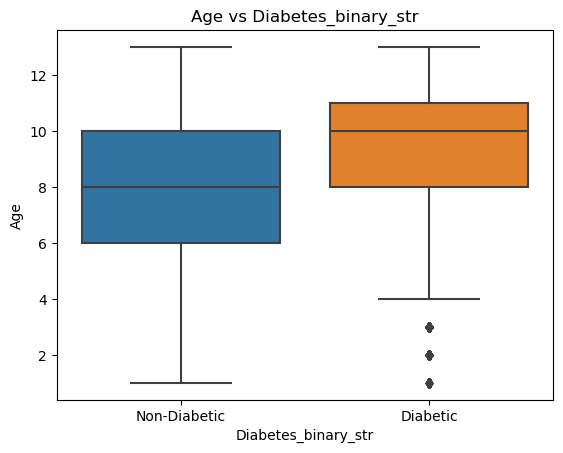

In [220]:
sns.boxplot(x = 'Diabetes_binary_str', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary_str')
plt.show()

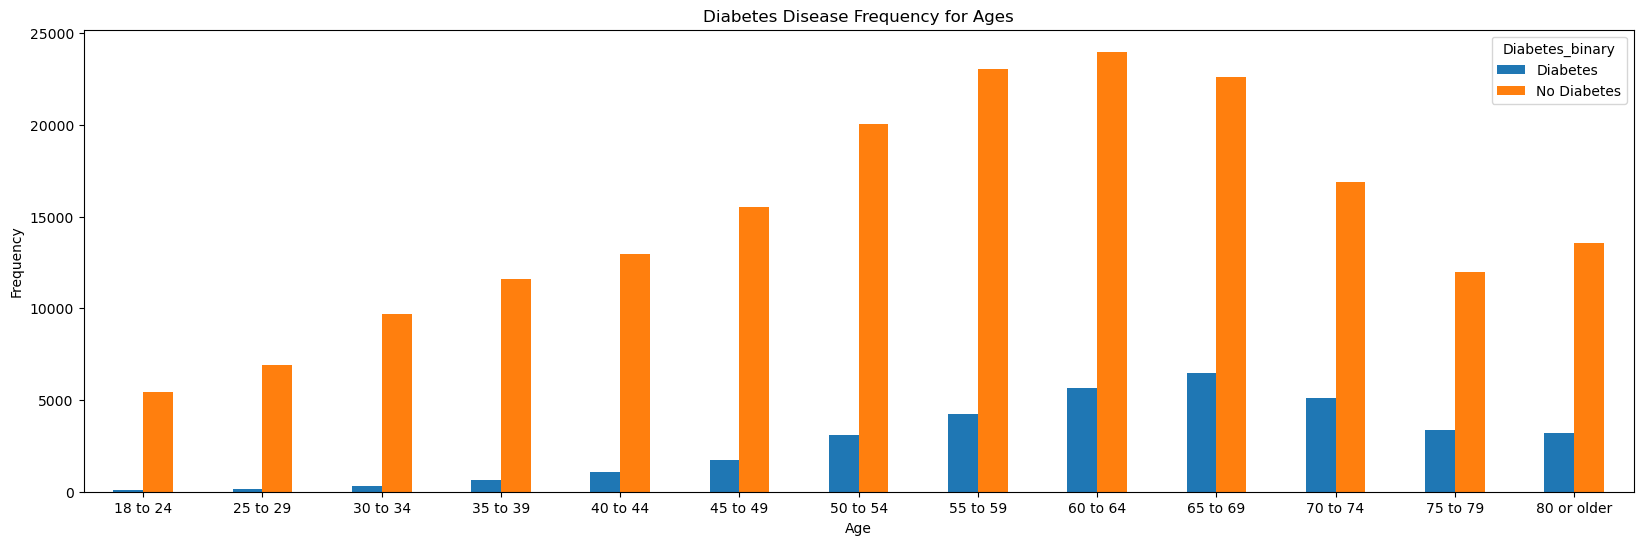

In [221]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


We know that as the age increases, the chances of diabetes also commonly increases. From above we can say, the median of the age of diabetic people is greater than that of non-diabetic people.

______________________________________________________________________________________________________________________

**The feature "Education" and it's relation with the target**

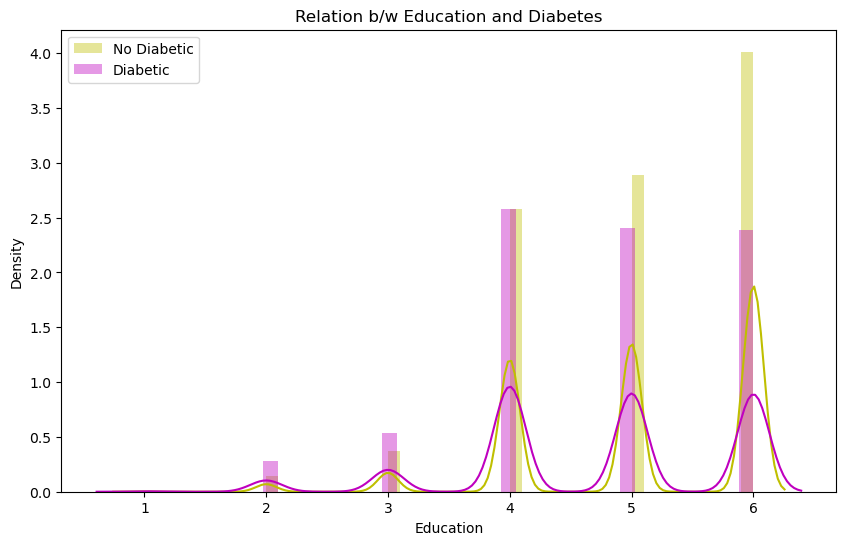

In [222]:
plt.figure(figsize=(10,6))


sns.distplot(data.Education[data.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

We can see that most of people have high education and in the high level of education , the healthy people is more than others

_____________________________________________________________________________________________________________________

**The feature "income" and it's relation with the target**

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 2000x1000 with 0 Axes>

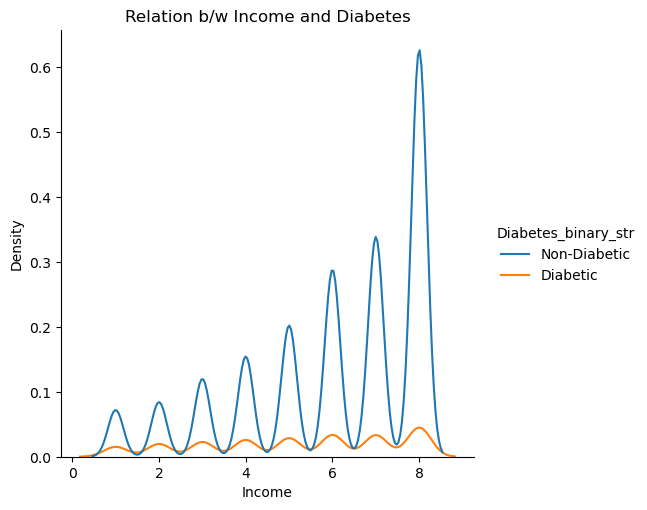

In [223]:
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_binary_str", kind="kde")
plt.title("Relation b/w Income and Diabetes")

We can see that most of people have high income and in the high level of income , the healthy people is more than others

______________________________________________________________________________________________________________________

**The feature "BMI" and it's relation with the target**

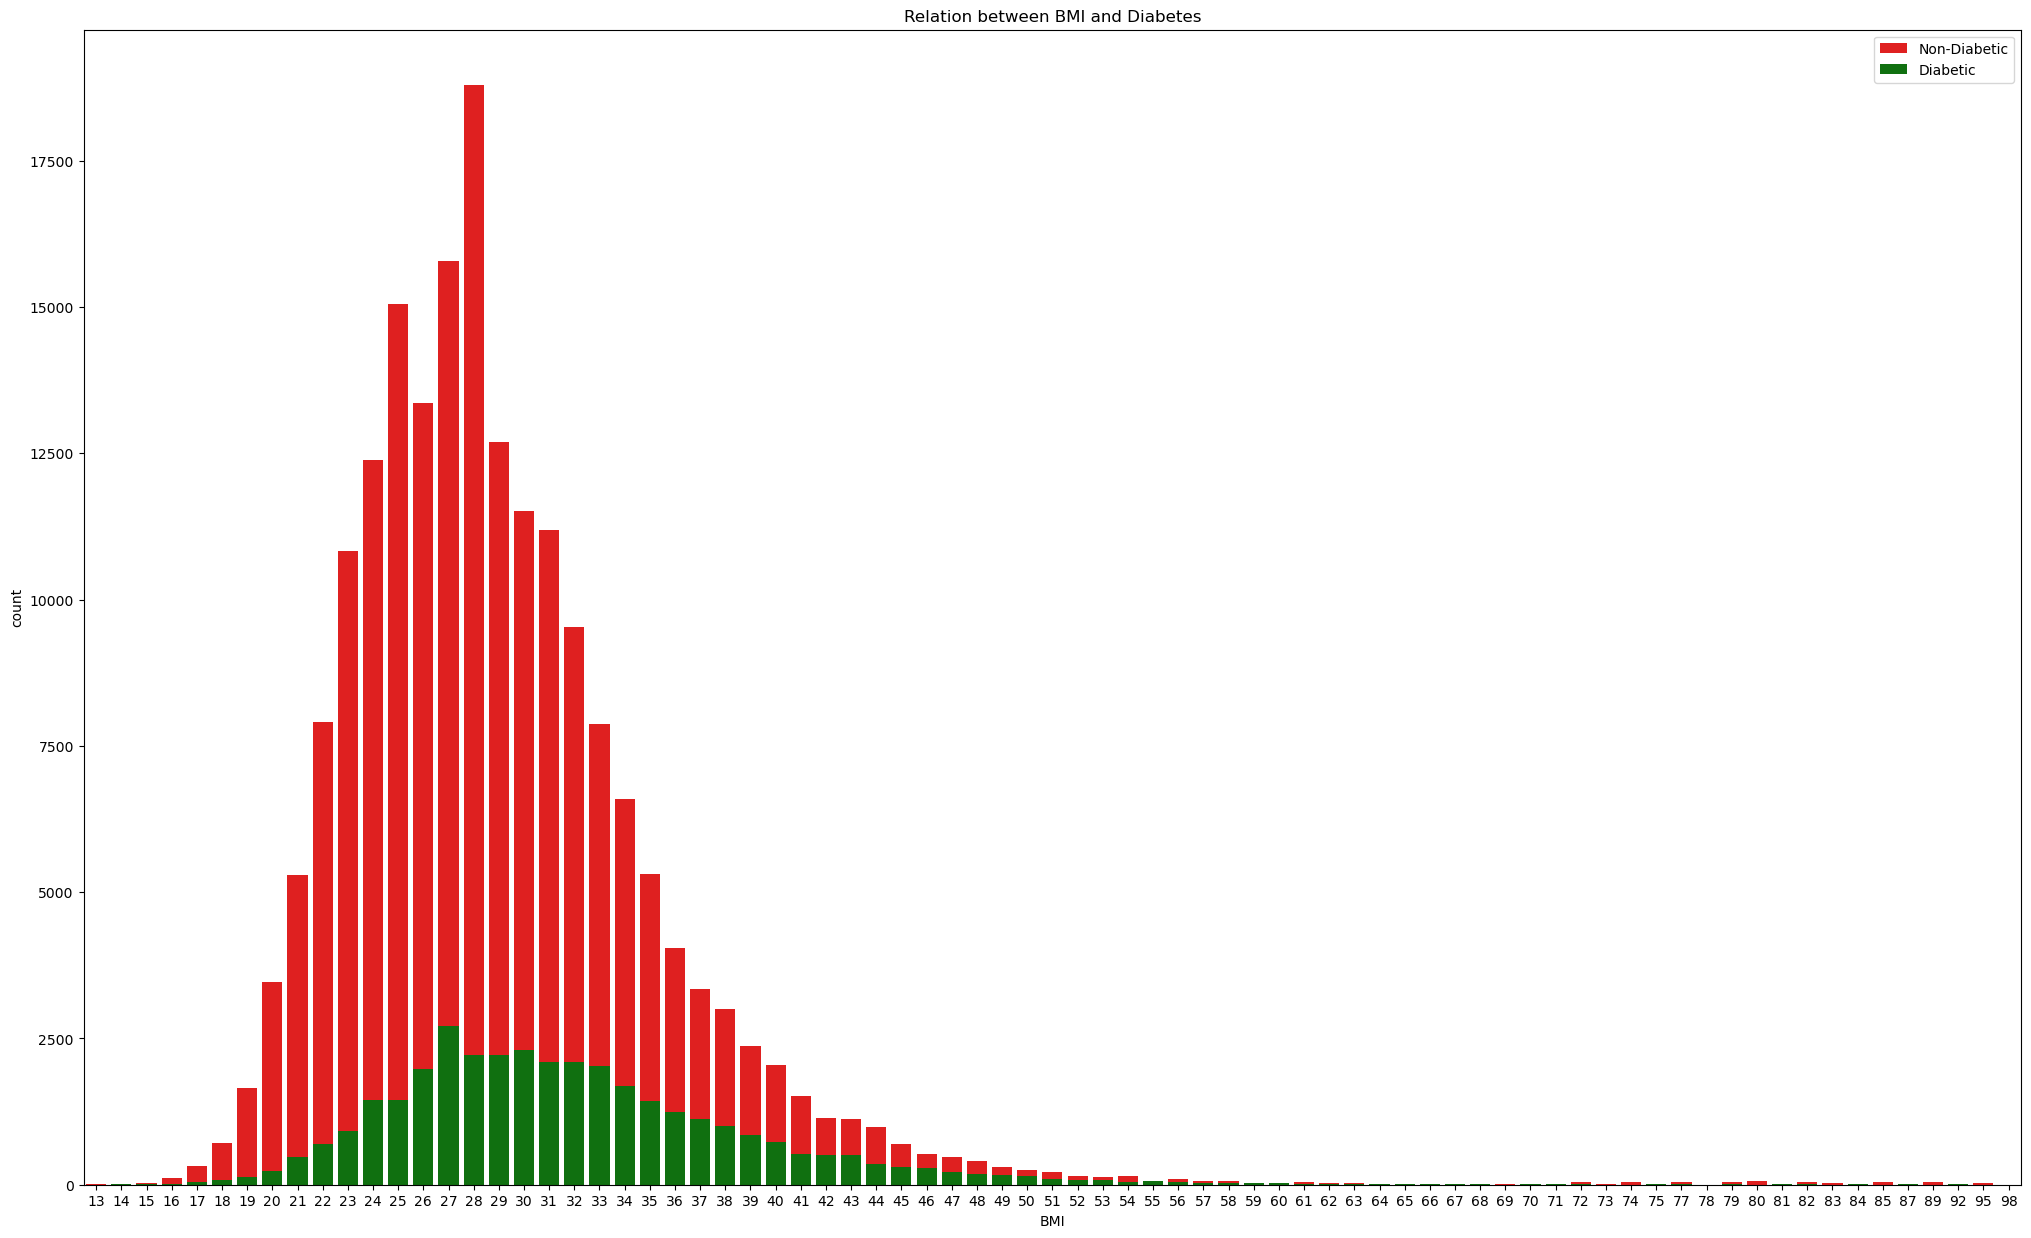

In [224]:
#count plot to see numbers of Diabetic and non Diabetic patient of Group two BMI 

plt.figure(figsize=(25, 15))

# Use integer values to filter data
sns.countplot(x=data.BMI[data.Diabetes_binary == 0], color="r", label="Non-Diabetic")
sns.countplot(x=data.BMI[data.Diabetes_binary == 1], color="g", label="Diabetic")

plt.title("Relation between BMI and Diabetes")
plt.legend()
plt.show()


As we can see people range between 24-33 BMI have more likely to have Diabetic.

note 

- Underweight: BMI less than 18.5
- Normal weight: BMI between 18.5 and 24.9
- Overweight: BMI between 25 and 29.9
- Obese: BMI of 30 or higher

________________________________________________________________________________________________________________________

**The feature "MentHlth" and it's relation with the target**

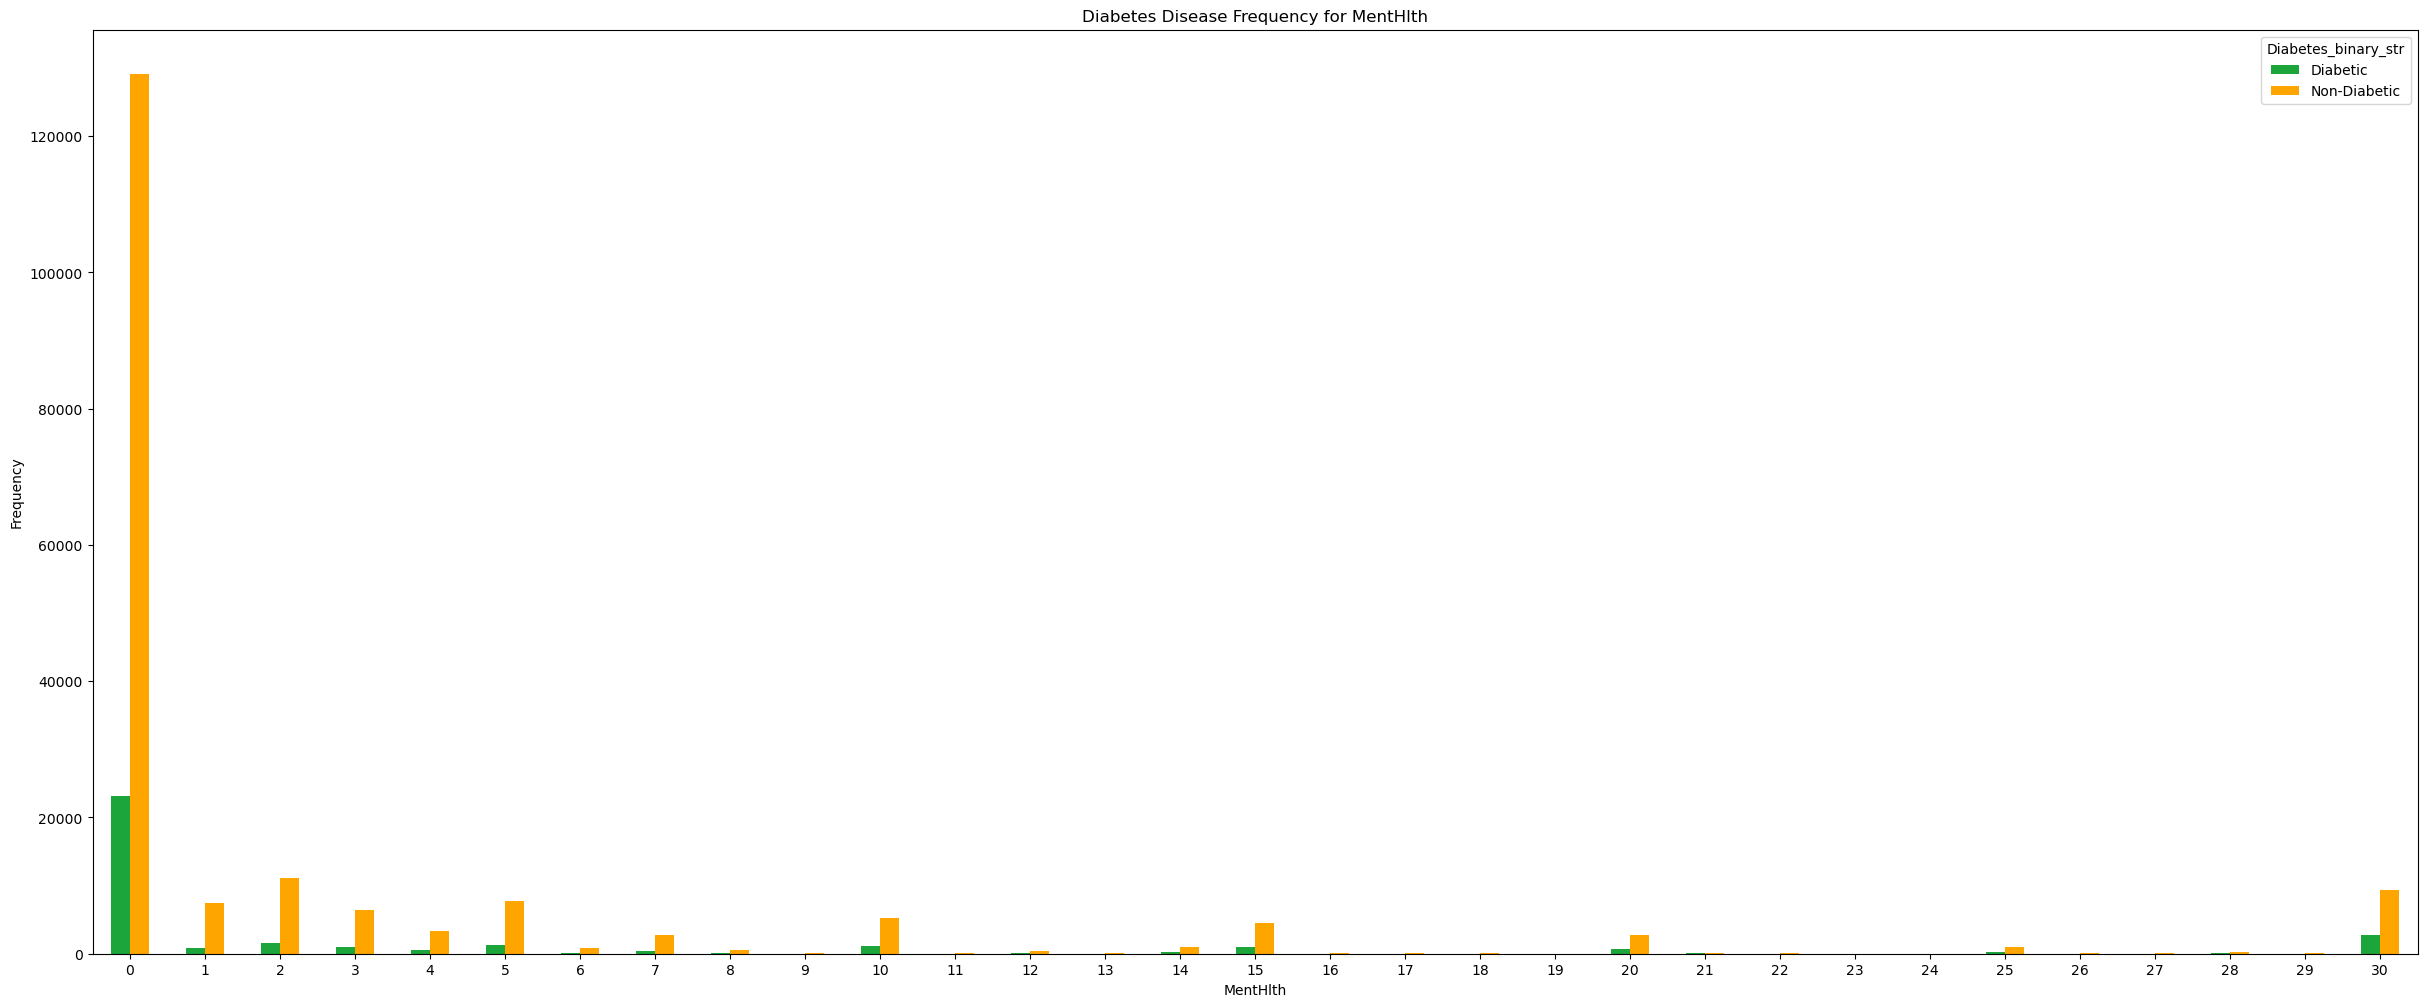

In [225]:
pd.crosstab(data.MentHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that Menthlth Group 0-5 have impact on Diabetic

____________________________________________________________________________________________________________________

**The feature "PhysHlth" and it's relation with the target**

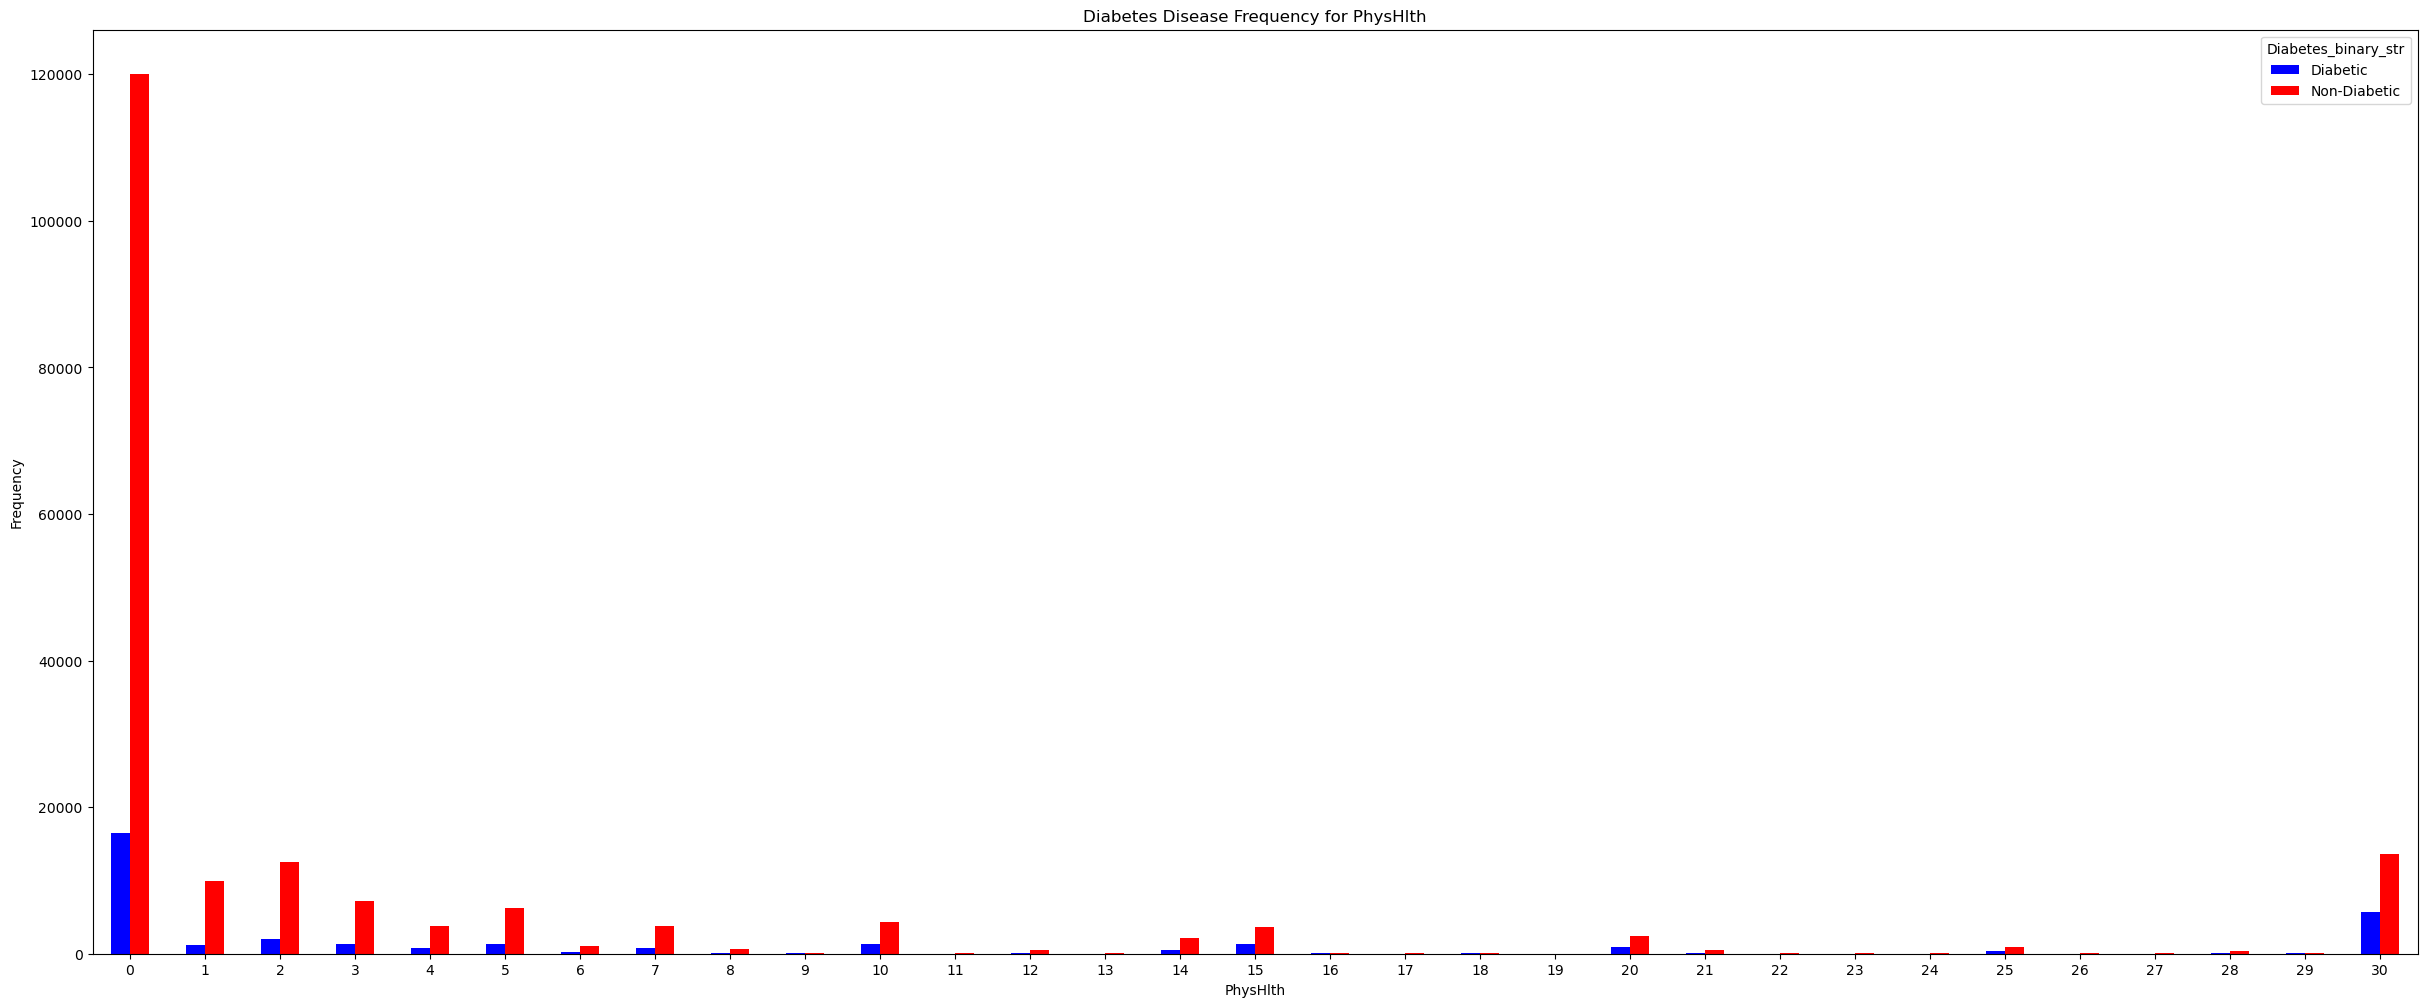

In [226]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that PhysHlth Group 0-5 have impact on Diabetic

______________________________________________________________________________________________________________________

**The feature "GenHlth" and it's relation with the target**

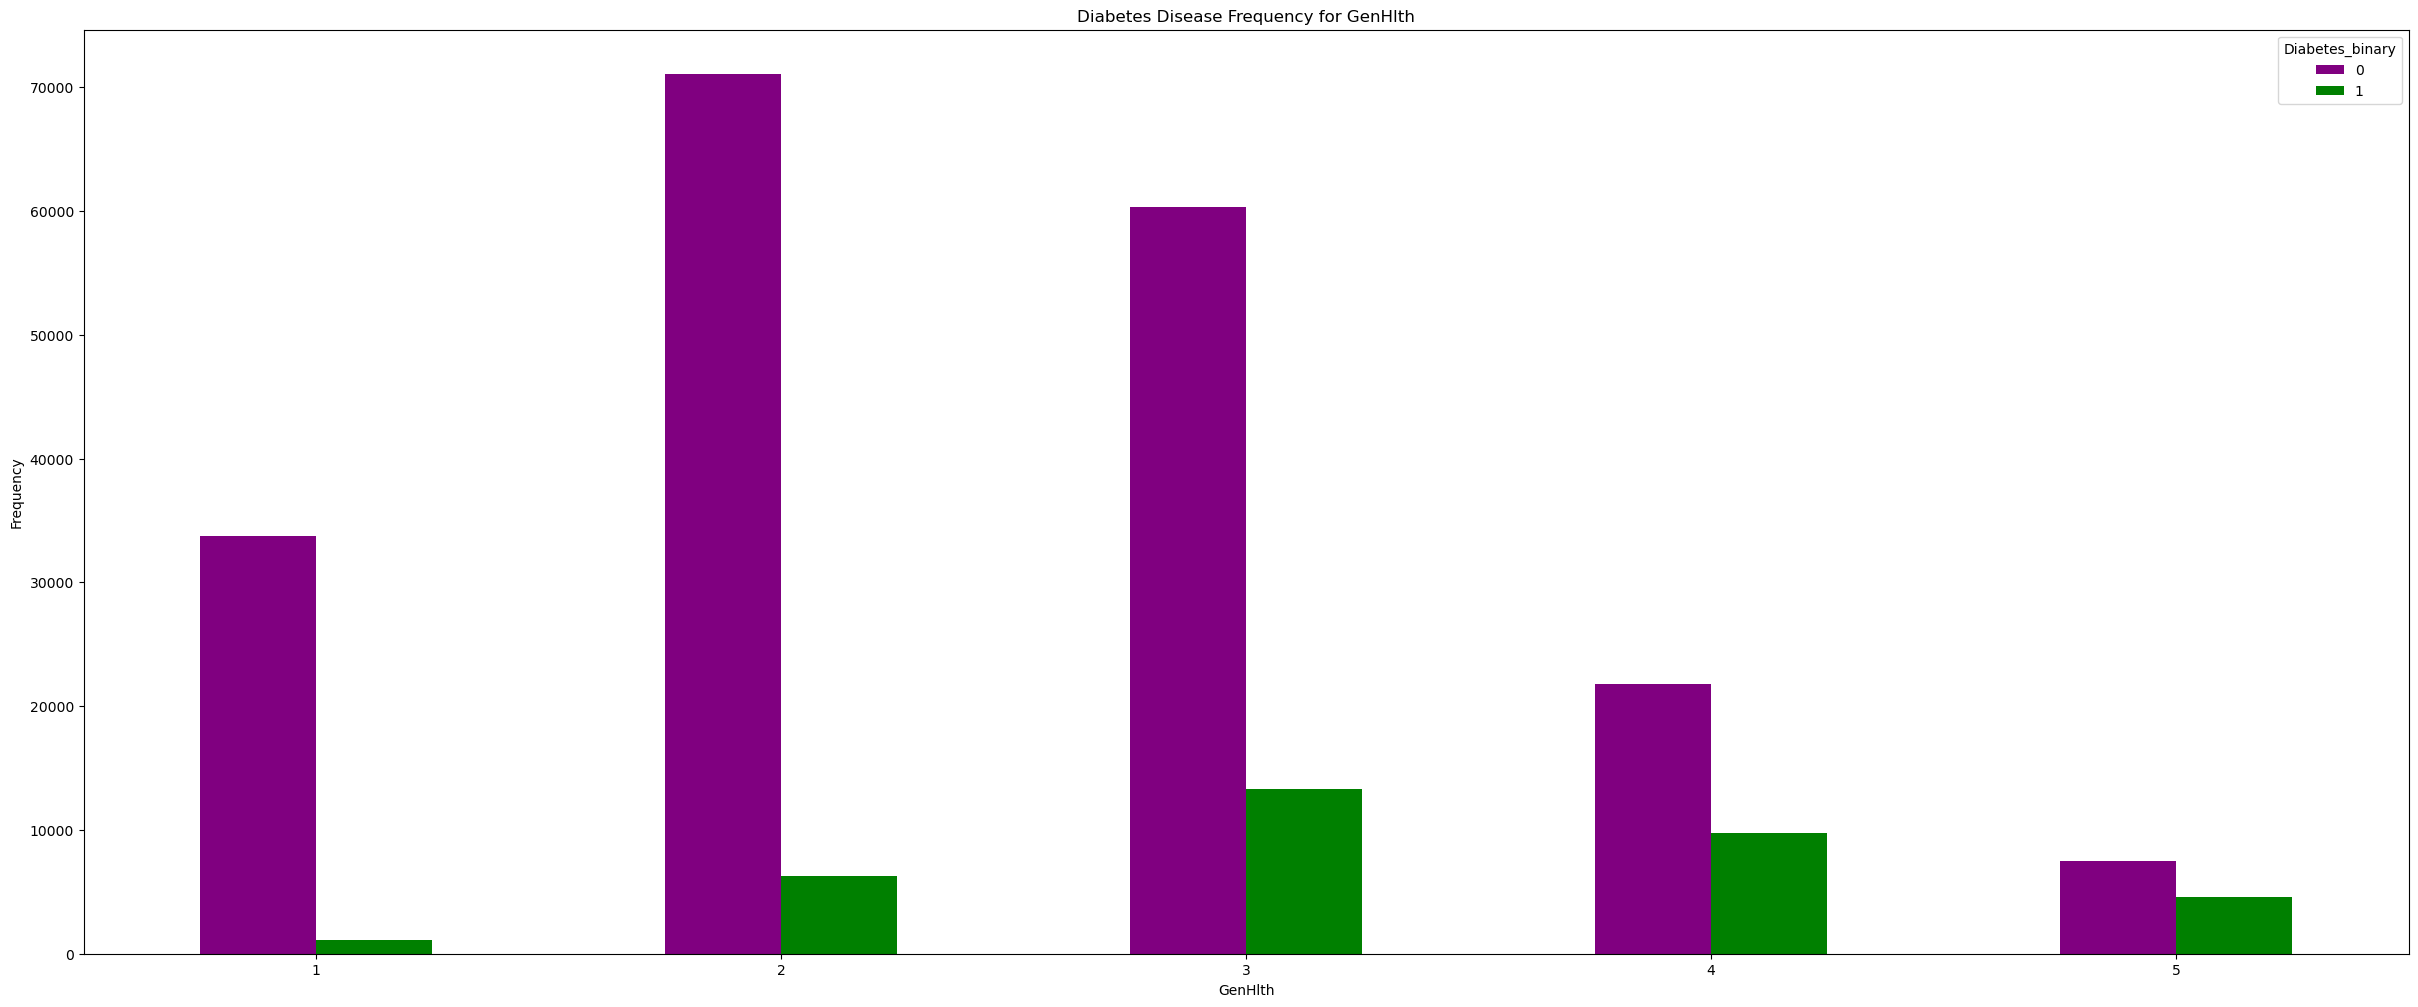

In [227]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

not many peolpe have "5" and "4" of GenHlth  ,but they have diabetes !!!

_________________________________________________________________________________________________________________

# Data Splitting and scaling

In [247]:
X=data.drop(columns=["Diabetes_binary", "Diabetes_binary_str"] ,axis=1)
Y=data["Diabetes_binary"]

In [248]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.3 , random_state=888, shuffle=True, stratify=Y)

scaling is not important as most of our columns are binary already so that may alter them

In [230]:
#from sklearn.preprocessing import StandardScaler

#scalar = StandardScaler()
#X_train = scalar.fit_transform(X_train)
#X_test = scalar.transform(X_test)

________________________________________________________________________________________________________________________

# Feature Selections

__________________________________________________________________________________________________________________

**With correlation**

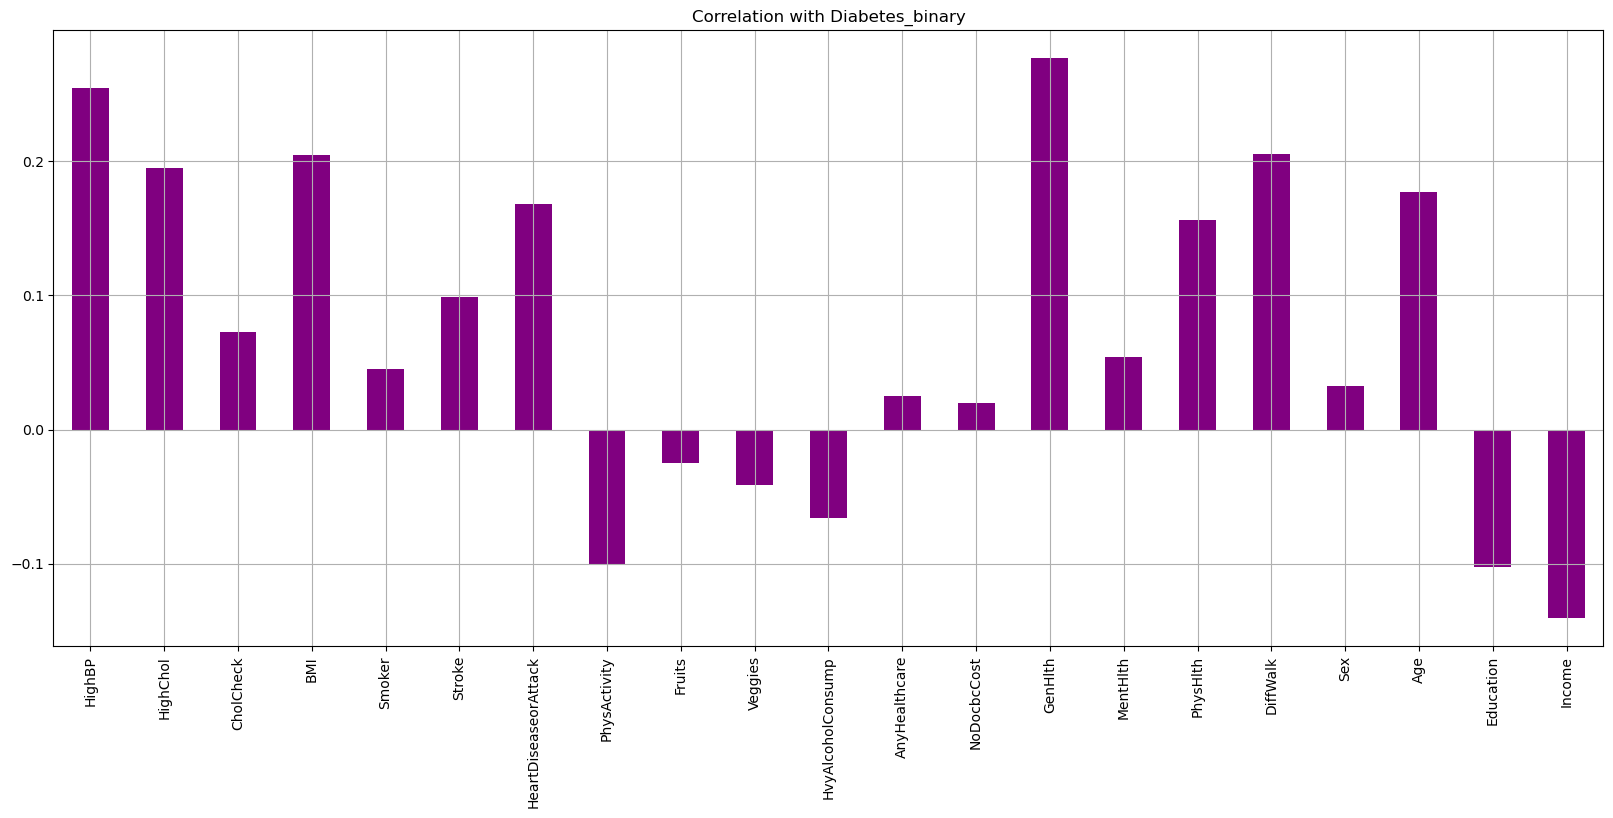

In [231]:
# Ensure numeric columns only
numeric_cols = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
data_numeric = data[numeric_cols]

# Calculate correlations
correlations = data_numeric.drop('Diabetes_binary', axis=1).corrwith(data_numeric.Diabetes_binary).plot(
    kind='bar', 
    figsize=(20, 8), 
    grid=True, 
    title="Correlation with Diabetes_binary",
    color="Purple"
)

**Diabetes_binary's relation with other columns Through bar Graph Result:**

1. Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2. HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

_______________________________________________________________________________________________________________________________

**VIF Test**

In [232]:

def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(X_train)  
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)  
print(ds)

const                   108.993579
HighBP                    1.300058
HighChol                  1.158494
CholCheck                 1.034220
BMI                       1.121252
Smoker                    1.076880
Stroke                    1.077532
HeartDiseaseorAttack      1.166546
PhysActivity              1.131050
Fruits                    1.098065
Veggies                   1.099796
HvyAlcoholConsump         1.025902
AnyHealthcare             1.110276
NoDocbcCost               1.135809
GenHlth                   1.722242
MentHlth                  1.221083
PhysHlth                  1.596499
DiffWalk                  1.512417
Sex                       1.076074
Age                       1.351786
Education                 1.268835
Income                    1.428603
dtype: float64


Thresholds for Concern:

- VIF < 5: Generally acceptable.
- VIF 5–10: Moderate multicollinearity; consider investigating.
- VIF > 10: High multicollinearity; problematic and may need addressing.

- GenHlth 
- PhysHlth
- PhysHlth
- DiffWalk
- Income

___________________________________________________________________________________________________

**Chi Square**

picked chi instead of anova as it looks better for our data

In [249]:
# Fit SelectKBest on X_train and Y_train
BestFeatures = SelectKBest(score_func=chi2, k=12)  # Adjust k to select 12 features
BestFeatures.fit(X_train, Y_train)

# Create a DataFrame with feature scores
df_scores = pd.DataFrame(BestFeatures.scores_)
df_columns = pd.DataFrame(X_train.columns)

# Concatenate two DataFrames for better visualization
f_Scores = pd.concat([df_columns, df_scores], axis=1)  # feature scores
f_Scores.columns = ['Feature', 'Score']

# Display the feature scores
print("Feature Scores:\n", f_Scores)

Feature Scores:
                  Feature         Score
0                 HighBP   5689.173634
1               HighChol   3454.797075
2              CholCheck     34.595706
3                    BMI  11019.221491
4                 Smoker    200.164770
5                 Stroke   1520.256208
6   HeartDiseaseorAttack   4108.708939
7           PhysActivity    447.410102
8                 Fruits     39.681776
9                Veggies     53.095115
10     HvyAlcoholConsump    645.618747
11         AnyHealthcare      5.548174
12           NoDocbcCost     67.108773
13               GenHlth   5346.662000
14              MentHlth   8188.616461
15              PhysHlth  68554.040868
16              DiffWalk   5496.600810
17                   Sex    104.621588
18                   Age   6071.239953
19             Education    319.647136
20                Income   2283.496514


In [250]:
# Transform X_train and X_test based on the fitted model
X_train_selected = BestFeatures.transform(X_train)
X_test_selected = BestFeatures.transform(X_test)

# Get the names of the top 12 selected features from f_Scores
selected_feature_names = f_Scores.nlargest(12, 'Score')['Feature'].values

# Convert X_train_selected and X_test_selected back to DataFrame with the selected features
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)

# Show the columns selected from the original data
print("\nSelected Features in X_train:")
print(X_train_selected_df.columns)


Selected Features in X_train:
Index(['PhysHlth', 'BMI', 'MentHlth', 'Age', 'HighBP', 'DiffWalk', 'GenHlth',
       'HeartDiseaseorAttack', 'HighChol', 'Income', 'Stroke',
       'HvyAlcoholConsump'],
      dtype='object')


In [238]:
print(f_Scores.nlargest(12,'Score'))

                 Feature         Score
15              PhysHlth  68554.040868
3                    BMI  11019.221491
14              MentHlth   8188.616461
18                   Age   6071.239953
0                 HighBP   5689.173634
16              DiffWalk   5496.600810
13               GenHlth   5346.662000
6   HeartDiseaseorAttack   4108.708939
1               HighChol   3454.797075
20                Income   2283.496514
5                 Stroke   1520.256208
10     HvyAlcoholConsump    645.618747


We will use those features in our model

______________________________________________________________________________________________________

# Dealing with imbalancing

In [252]:
Y.value_counts()

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64

In [253]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the selected features
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train_selected, Y_train)

In [241]:
Y_resampled.value_counts()

Diabetes_binary
0    136063
1    136063
Name: count, dtype: int64

In [255]:
print("X_train_selected shape:", X_resampled.shape)
print("X_test_selected shape:", X_test_selected.shape)

X_train_selected shape: (272126, 12)
X_test_selected shape: (68843, 12)


_______________________________________________________________________________________________________________________

# Modeling

**Logistic**

In [260]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_resampled , Y_resampled)
# make predictions on test set
y_pred=lg.predict(X_test_selected)

print('Training set score: {:.4f}'.format(lg.score(X_resampled, Y_resampled)))

print('Test set score: {:.4f}'.format(lg.score(X_test_selected, Y_test)))

Training set score: 0.7139
Test set score: 0.6948


In [261]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.3052307424138983
Root Mean Squared Error : 0.5524769157294251


In [262]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.94      0.69      0.79     58314
           1       0.30      0.75      0.43     10529

    accuracy                           0.69     68843
   macro avg       0.62      0.72      0.61     68843
weighted avg       0.84      0.69      0.74     68843



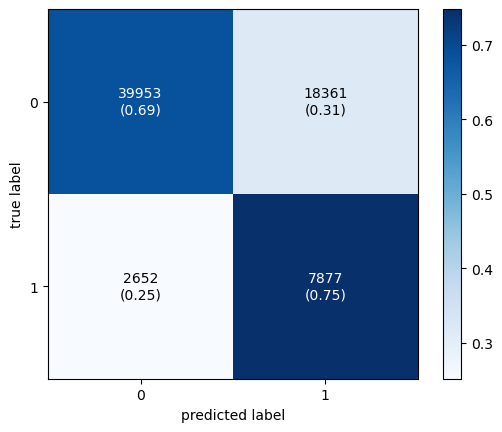

In [263]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Desicion Tree model**

In [265]:
dt = DecisionTreeClassifier(max_depth= 12)
dt.fit(X_resampled , Y_resampled)

DecisionTreeClassifier(max_depth=12)

In [267]:
# make predictions on test set
y_pred=dt.predict(X_test_selected)

print('Training set score: {:.4f}'.format(dt.score(X_resampled, Y_resampled)))

print('Test set score: {:.4f}'.format(dt.score(X_test_selected, Y_test)))

Training set score: 0.7481
Test set score: 0.6678


In [268]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.3322487398864082
Root Mean Squared Error : 0.5764102184090842


In [269]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.94      0.65      0.77     58314
           1       0.28      0.75      0.41     10529

    accuracy                           0.67     68843
   macro avg       0.61      0.70      0.59     68843
weighted avg       0.84      0.67      0.71     68843



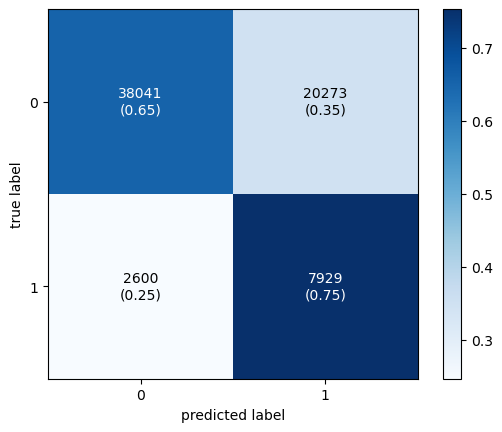

In [270]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**KNN**

In [271]:
knn = KNeighborsClassifier(n_neighbors= 6 )
knn.fit(X_resampled , Y_resampled)

KNeighborsClassifier(n_neighbors=6)

In [272]:
# make predictions on test set
y_pred=knn.predict(X_test_selected)

print('Training set score: {:.4f}'.format(knn.score(X_resampled, Y_resampled)))

print('Test set score: {:.4f}'.format(knn.score(X_test_selected, Y_test)))

Training set score: 0.8246
Test set score: 0.7673


In [273]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.2327324491959967
Root Mean Squared Error : 0.4824235164209936


In [274]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     58314
           1       0.31      0.41      0.35     10529

    accuracy                           0.77     68843
   macro avg       0.60      0.62      0.60     68843
weighted avg       0.80      0.77      0.78     68843



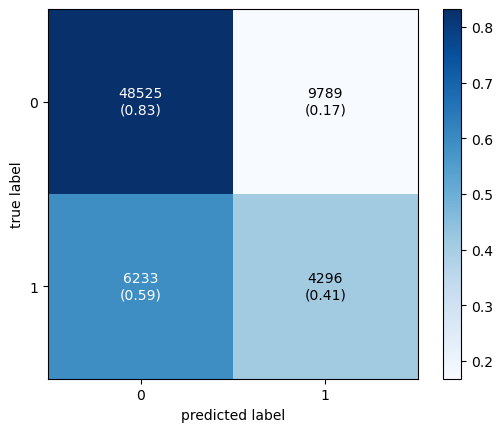

In [275]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Rondom Forest**

In [276]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(X_resampled, Y_resampled)


RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [277]:
# make predictions on test set
y_pred=rf.predict(X_test_selected)

print('Training set score: {:.4f}'.format(rf.score(X_resampled, Y_resampled)))

print('Test set score: {:.4f}'.format(rf.score(X_test_selected, Y_test)))

Training set score: 0.7523
Test set score: 0.6918


In [278]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.3081940066528187
Root Mean Squared Error : 0.555152237366309


In [279]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     58314
           1       0.30      0.76      0.43     10529

    accuracy                           0.69     68843
   macro avg       0.62      0.72      0.61     68843
weighted avg       0.84      0.69      0.73     68843



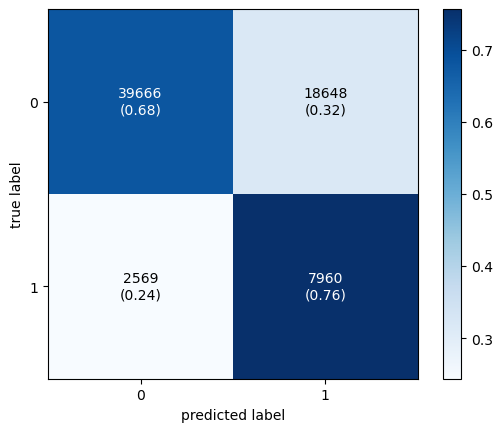

In [280]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**SVM**

In [281]:
from sklearn.svm import SVC

# define the model
clf = SVC(kernel='rbf', C=1.0)

# train the model
clf.fit(X_resampled, Y_resampled)

y_pred=clf.predict(X_test_selected)

print('Training set score: {:.4f}'.format(clf.score(X_resampled, Y_resampled)))

print('Test set score: {:.4f}'.format(clf.score(X_test_selected, Y_test)))

Training set score: 0.7195
Test set score: 0.6674


In [282]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.3325537817933559
Root Mean Squared Error : 0.576674762577101


In [283]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.95      0.64      0.77     58314
           1       0.29      0.80      0.42     10529

    accuracy                           0.67     68843
   macro avg       0.62      0.72      0.60     68843
weighted avg       0.85      0.67      0.71     68843



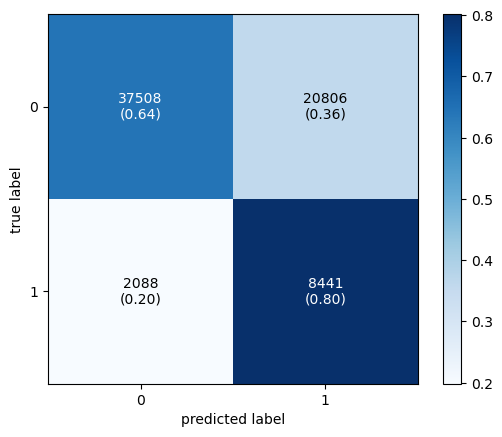

In [284]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**XGBoost**

In [285]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_resampled , Y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [286]:
y_pred=xg.predict(X_test_selected)

print('Training set score: {:.4f}'.format(xg.score(X_resampled, Y_resampled)))

print('Test set score: {:.4f}'.format(xg.score(X_test_selected, Y_test)))

Training set score: 0.7383
Test set score: 0.6895


In [287]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.31053266127275103
Root Mean Squared Error : 0.5572545749231235


In [288]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     58314
           1       0.30      0.75      0.43     10529

    accuracy                           0.69     68843
   macro avg       0.62      0.71      0.61     68843
weighted avg       0.84      0.69      0.73     68843



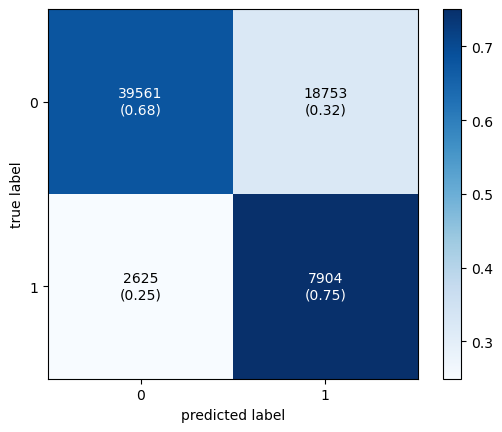

In [289]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()